In [162]:
%matplotlib inline

In [163]:
# Import Dependencies
import json
import requests
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import scipy.stats as st
import datetime
from pathlib import Path

In [164]:
# Import csv file and make DataFrame
uber_data = Path("../Resources/Uber_Project_CSV.csv")
uber_df = pd.read_csv(uber_data)
uber_df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,1/1/2015 1:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,1/1/2015 1:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,1/1/2015 1:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,1/1/2015 1:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,1/1/2015 1:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [165]:
#Import URL and API
# url = ""
# weather_api = requests.get(url)
# print(weather_api)


In [166]:
# 1 hour, 6 hour, 24 hour - is there a difference
# Difference between rainy  and snowy day pickups? - Caleb

In [167]:
# How does the relative temperature and humidity affect pickups? - Caleb

In [168]:
# Does Wind Speed affect the number of pickups? How does wind with or without precipitation affect it? - Ryan

In [169]:
#Does different boroughs? Ryan

In [193]:
# Does the day of the week effect pickups? - Fidel
uber_df['timestamp']= pd.to_datetime(uber_df['pickup_dt'])
uber_df['timestamp'].dt.day_name()
uber_df['day_of_the_week']=uber_df['timestamp'].dt.day_name()
uber_df_2=uber_df[["day_of_the_week", "pickups"]]


print(uber_df_2)



      day_of_the_week  pickups
0            Thursday      152
1            Thursday     1519
2            Thursday        0
3            Thursday     5258
4            Thursday      405
...               ...      ...
29096         Tuesday        0
29097         Tuesday     3828
29098         Tuesday      580
29099         Tuesday        0
29100         Tuesday        3

[29101 rows x 2 columns]


In [194]:
# Extract individual days
group0 = uber_df_2[uber_df_2["day_of_the_week"] == 'Friday']["pickups"]
group1 = uber_df_2[uber_df_2["day_of_the_week"] == 'Monday']["pickups"]
group2 = uber_df_2[uber_df_2["day_of_the_week"] == 'Saturday']["pickups"]
group3 = uber_df_2[uber_df_2["day_of_the_week"] == 'Sunday']["pickups"]
group4 = uber_df_2[uber_df_2["day_of_the_week"] == 'Thursday']["pickups"]
group5= uber_df_2[uber_df_2["day_of_the_week"] == 'Tuesday']["pickups"]
group6= uber_df_2[uber_df_2["day_of_the_week"] == 'Wednesday']["pickups"]


In [202]:
# Perform the ANOVA
st.f_oneway(group0, group1, group2, group3, group4,group5,group6)

F_onewayResult(statistic=12.766621162505526, pvalue=1.880511996714594e-14)

In [209]:
#creating variables for the barchart
pickup_by_day=uber_df.groupby(["day_of_the_week"])["pickups"].mean()
pick_by_days= pickup_by_day.sort_values(ascending= True)

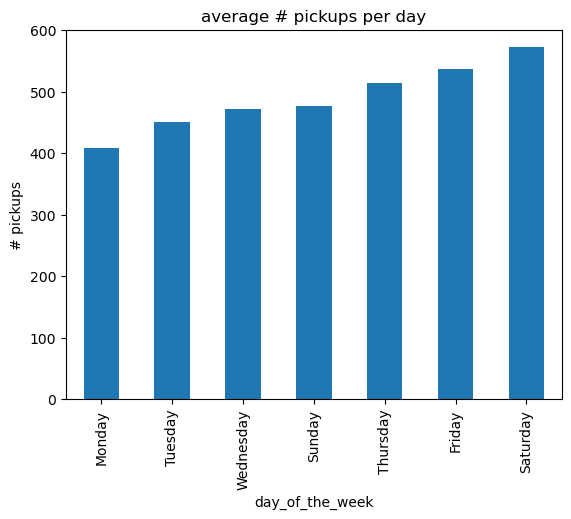

<Figure size 640x480 with 0 Axes>

In [211]:
#Bar graph to show how many pickups occured per day
pick_up_days_chart= pick_by_days.plot(kind= 'bar', fig= (7,7))
# Set the xlabel and ylabel using class methods
pick_up_days_chart.set_xlabel("day_of_the_week")
pick_up_days_chart.set_ylabel("# pickups")

#add title to chart
plt.title('average # pickups per day')

plt.show()
plt.tight_layout()

In [ ]:
# Correlation and Regression

## Analysis